## 0. Import Necessary Libraries

In [1]:
import glob
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load the Data

### 1.1. Create a list of files in the folder

In [2]:
file_list = glob.glob(os.path.join(os.getcwd(), "D:/Users/suuser/Desktop/Cesitli/SICSS/data/vaccine_tweets", "*.json"))

tweet_list = [s for s in file_list if "data_" in s]
user_list  = [s for s in file_list if "users_" in s]

### 1.2. Collect all .json files

In [3]:
tweet_data = []

for file_name in tweet_list:
    with open(file_name, encoding="utf8") as json_file:
        json_file = json.load(json_file)
        for data in json_file:
            tweet_data.append(data)
            

user_data = []

for file_name in user_list:
    with open(file_name, encoding="utf8") as json_file:
        json_file = json.load(json_file)
        for data in json_file['users']:
            user_data.append(data)

### 1.3. Convert to Pandas DataFrame

In [4]:
tweet_data = pd.DataFrame(tweet_data)
user_data = pd.DataFrame(user_data)

### 1.4. Drop Unnecessary Columns

In [6]:
tweet_data.drop(columns=['entities','context_annotations', 'referenced_tweets', 'conversation_id', 'source', 'attachments', 
                         'in_reply_to_user_id', 'withheld', 'geo'], inplace=True)


user_data.drop(columns=['protected','profile_image_url','pinned_tweet_id', 'url', 'entities', 'withheld'], inplace=True)

### 1.5. Change Column Names of user_data

In [18]:
user_data.columns = ['user_' + x for x in user_data.columns]

### 1.6. Merge tweet_data & user_data

In [35]:
df = tweet_data.merge(user_data.drop_duplicates('user_id'), how='left', left_on = 'author_id', right_on = 'user_id')
df.drop(columns=['user_id'], inplace=True)

### 1.7. Convert Associated Columns to Datetime

In [395]:
df.created_at = pd.to_datetime(df.created_at)
df.user_created_at = pd.to_datetime(df.user_created_at)

### 1.8. Save Data as .csv

In [37]:
df.to_csv('D:/Users/suuser/Desktop/Cesitli/SICSS/data/df.csv')

In [4]:
#df = pd.read_csv('D:/Users/suuser/Desktop/Cesitli/SICSS/data/df.csv').drop(columns=['Unnamed: 0'])

In [6]:
df

,created_at,lang,text,id,public_metrics,author_id,possibly_sensitive,user_created_at,user_username,user_public_metrics,user_name,user_verified,user_description,user_location
0,2020-03-06T22:41:42.000Z,tr,Bu aşı tutarsa ... senaryo belli .\nGerisi mal...,1236059409144582145,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",890673416419889153,False,2017-07-27T20:41:05.000Z,Omer77RR,"{'followers_count': 1984, 'following_count': 1...",Ömer ŞEN,False,𝓟𝓼𝓲𝓴𝓸𝓵𝓸𝓳𝓲𝓴 𝓓𝓪𝓷ı𝓼𝓶𝓪𝓷 𝓡𝓮𝓱𝓫𝓮𝓻 𝓞𝓰𝓻𝓮𝓽𝓶𝓮𝓷,NaN
1,2020-03-06T22:39:41.000Z,tr,@sputnik_TR Acaba Corona virüsünün hangi versi...,1236058899784052742,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1510151526,False,2013-06-12T10:52:18.000Z,antentamircisi7,"{'followers_count': 320, 'following_count': 49...",Dr.roland,False,NaN,NaN
2,2020-03-06T22:16:47.000Z,tr,Yeni tip koronavirüse (Kovid-19) karşı ABD Kar...,1236053139809320962,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",3312929866,False,2015-06-08T07:41:48.000Z,CapaMagEkonomi,"{'followers_count': 70518, 'following_count': ...",ÇapaMag Ekonomi,False,"Paranın araç değil, amaç olduğunu bilenlerin h...","İstanbul, Türkiye"
3,2020-03-06T22:09:39.000Z,tr,"📍ABD ordusundan ""koronavirüs aşısı farelerde d...",1236051344584302597,"{'retweet_count': 7, 'reply_count': 2, 'like_c...",808297868410912768,False,2016-12-12T13:10:04.000Z,eha_medya,"{'followers_count': 109073, 'following_count':...",EHA MEDYA,True,Korkusuz & Doğru Habercilik — (Eng: @eha_news ...,NaN
4,2020-03-06T21:39:39.000Z,tr,"@traderAT12 Pfizer, koronavirüs tedavileri pot...",1236043791909498880,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",1224208283831087104,True,2020-02-03T05:50:03.000Z,MehmetSedatAyd1,"{'followers_count': 13, 'following_count': 143...",Mehmet Sedat Aydın,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598093,2021-06-18T13:46:41.000Z,tr,@halukvehaluk ya hu biz biontech olduk yandan ...,1405884674182897664,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1282554481755000832,False,2020-07-13T05:56:50.000Z,erafettinelik17,"{'followers_count': 60, 'following_count': 268...",SerefCHElik,False,insan....insana dair....insnca.... ve elbette ...,İstanbul
598094,2021-06-18T13:46:28.000Z,tr,@mekselenya @haskologlu Sinovac ol o zaman mrn...,1405884619938054147,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1309582708553781250,False,2020-09-25T19:57:12.000Z,bullsshhiiitt,"{'followers_count': 23, 'following_count': 235...",peníze,False,NaN,NaN
598095,2021-06-18T13:46:22.000Z,tr,Bu iyi haber değil 😔 Bir an önce herkesi Biont...,1405884594906337282,"{'retweet_count': 0, 'reply_count': 1, 'like_c...",169010330,False,2010-07-21T09:25:08.000Z,thedissenterone,"{'followers_count': 4377, 'following_count': 3...",Lone Wolf 128M 🥃🍷🎮🎬🌈 🏀 🎾🐈,False,"Hümanist, Herşeye Muhalif, KAL 97, Eczacı, Çiz...",Istanbul
598096,2021-06-18T13:46:13.000Z,tr,Biontech Covid19 aşısı erkeklerde sperm sayısı...,1405884557644242948,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",1236796922,False,2013-03-02T22:45:02.000Z,drsyucel,"{'followers_count': 417, 'following_count': 60...",Selçuk Yücel,False,Pediatric/Transitional/Adult Reconstructive Ur...,"İstanbul, Türkiye"


## 2. Counting Things

### 2.1. Create Categorical Variables for Each Keyword

In [419]:
#Çin Aşısı fayzer"
df.loc[df.text.str.lower().str.contains('cin asi|çin aşı|çın aşı|çin aşi|cın ası|cın aşı|çın aşi|çin asi|cin aşı'), 'cin_asi'] = 1

#Sinovac
df.loc[df.text.str.lower().str.contains('sinovac|sınovac|sınovaç|sinovaç|sinovak|coronavac'), 'sinovac'] = 1

#Alman Aşısı
df.loc[df.text.str.lower().str.contains('alman asi|alman aşı|alman aşi'), 'alman_asi'] = 1

#Biontech
df.loc[df.text.str.lower().str.contains('biontech|bıontech|biontec|bıontec'), 'biontech'] = 1

#Pfizer
df.loc[df.text.str.lower().str.contains('pfizer|pfızer'), 'pfizer'] = 1

#Gavur Aşısı
df.loc[df.text.str.lower().str.contains('gavur aşı|gavur aşi|gavur asi'), 'gavur_asi'] = 1

In [420]:
df['created_month'] = df.created_at.dt.to_period('m')

D:\Users\suuser\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arrays\datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [430]:
df.alman_asi.sum()

5305.0

2021-06-22 12:11:59,826 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 12:11:59,829 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 12:11:59,888 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021-06-22 12:11:59,889 - matplotlib.category - INFO
Msg: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

2021

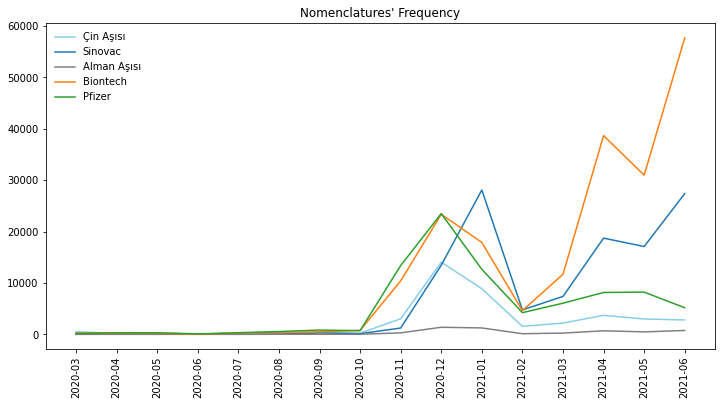

In [433]:
plt.figure(figsize=(12,6))

plt.plot(df.pivot_table(values=['cin_asi'], index='created_month', aggfunc='sum').reset_index().created_month.astype('str'),
         df.pivot_table(values=['cin_asi'], index='created_month', aggfunc='sum').reset_index().cin_asi, label='Çin Aşısı', c='skyblue')

plt.plot(df.pivot_table(values=['sinovac'], index='created_month', aggfunc='sum').reset_index().created_month.astype('str'),
         df.pivot_table(values=['sinovac'], index='created_month', aggfunc='sum').reset_index().sinovac, label='Sinovac')

plt.plot(df.pivot_table(values=['alman_asi'], index='created_month', aggfunc='sum').reset_index().created_month.astype('str'),
         df.pivot_table(values=['alman_asi'], index='created_month', aggfunc='sum').reset_index().alman_asi, label='Alman Aşısı', c='gray')

plt.plot(df.pivot_table(values=['biontech'], index='created_month', aggfunc='sum').reset_index().created_month.astype('str'),
         df.pivot_table(values=['biontech'], index='created_month', aggfunc='sum').reset_index().biontech, label='Biontech')

plt.plot(df.pivot_table(values=['pfizer'], index='created_month', aggfunc='sum').reset_index().created_month.astype('str'),
         df.pivot_table(values=['pfizer'], index='created_month', aggfunc='sum').reset_index().pfizer, label='Pfizer')

plt.title("Nomenclatures' Frequency")
plt.xticks(rotation=90)
plt.legend(frameon=False)
plt.show()

## 3. Preprocess the Text
1. Remove emojis
2. Tokenize using Zemberek and remove incomprehensible items in text
3. Replace punctuations with white space

### 3.1. Import Necessary Libraries and Define zemberek_tokenizer

In [130]:
import nltk
import string
import re

from zemberek import (
    TurkishSpellChecker,
    TurkishSentenceNormalizer,
    TurkishSentenceExtractor,
    TurkishMorphology,
    TurkishTokenizer
)

zemberek_tokenizer = TurkishTokenizer.DEFAULT

### 3.2. Define Preprocessing Functions

In [382]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r' ',text)

def text_preprocess(text):
    allowed_types = ['WordWithSymbol', 'Word', 'Punctuation', 'Number', 'UnknownWord']
    translator = str.maketrans(string.punctuation.replace('.','').replace('@',''), ' '*len(string.punctuation.replace('.','').replace('@','')))
    
#    text = deEmojify(text)
    text = " ".join([token.content for token in zemberek_tokenizer.tokenize(text) if token.type_.name in allowed_types])
    text = text.translate(translator)
    text = re.sub(' +', ' ', text)
    text = [word for word in text.split()]
    return " ".join(text)

### 3.3. Test the Preprocessing Function

In [311]:
number = 203060
text = text_preprocess(df.text[number])

print(df.text[number], "\n\n", text)

"En kötü aşı bile en iyi koronavirüs hastalığından iyidir"
Bilim Kurulu Üyesi Azap, mRNA aşılarına bağlı alerjik yan etkilerin diğer aşılara göre daha fazla olduğunu söyledi, 'Ancak en kötü aşı bile en iyi koronavirüs hastalığından iyidir' dedi

https://t.co/7I1gVJ8APB https://t.co/IUPlCHMSzA 

 En kötü aşı bile en iyi koronavirüs hastalığından iyidir Bilim Kurulu Üyesi Azap mRNA aşılarına bağlı alerjik yan etkilerin diğer aşılara göre daha fazla olduğunu söyledi Ancak en kötü aşı bile en iyi koronavirüs hastalığından iyidir dedi


### 3.4. Preprocess the Whole DF

In [387]:
df['processed_text'] = df.text.apply(lambda x: text_preprocess(x))

## 4. Sentiment Analysis

### 4.1. Model Comparison
We find that electra-turkish-sentiment-analysis works best in our scenario

In [217]:
from transformers import AutoModel, AutoTokenizer, AutoModelForSequenceClassification, pipeline

model_1 = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer_1 = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")

sa_1 = pipeline("sentiment-analysis", tokenizer=tokenizer_1, model=model_1)

In [218]:
model_2 = AutoModelForSequenceClassification.from_pretrained("kuzgunlar/electra-turkish-sentiment-analysis")
tokenizer_2 = AutoTokenizer.from_pretrained("kuzgunlar/electra-turkish-sentiment-analysis")

sa_2 = pipeline("sentiment-analysis", tokenizer=tokenizer_2, model=model_2)

### 4.2. Define Sentiment Analyzer Function

We use electra-turkish-sentiment-analysis for this task (experiments)

In [369]:
def sentiment_analyzer(text):
    result = sa_2(text)
    
    if result[0]['score'] <= 0.7:
        sentiment = 0
    
    else:
        if result[0]['label'] == 'Positive':
            sentiment = 1

        else:
            sentiment = -1
            
    return sentiment

In [386]:
number = 203030

print(sentiment_analyzer(text_preprocess(df.text[number])))
print(text_preprocess(df.text[number]))
print(sa_2(text_preprocess(df.text[number])))

1
BioNTech ve Pfizer 2021 aşı üretim hedefini 2 milyar doza çıkardı
[{'label': 'Positive', 'score': 0.9812076091766357}]


### 4.3. Sentiment Analysis all DF

In [391]:
df['sentiment'] = df.processed_text.apply(lambda x: sentiment_analyzer(x))

In [435]:
df.to_csv('D:/Users/suuser/Desktop/Cesitli/SICSS/data/df_2.csv')

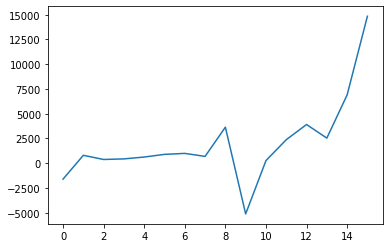

In [415]:
plt.plot(df.pivot_table(columns=df.created_month, values='sentiment', aggfunc='sum').T.sentiment.values)